# [作業目標]
- 利用範例的創建方式, 創建一組資料, 並練習如何取出最大值

# [作業重點]
- 練習創立 DataFrame (In[2])
- 如何取出口數最多的國家 (In[3], Out[3])

## 練習時間
在小量的資料上，我們用眼睛就可以看得出來程式碼是否有跑出我們理想中的結果

請嘗試想像一個你需要的資料結構 (裡面的值可以是隨機的)，然後用上述的方法把它變成 pandas DataFrame

#### Ex: 想像一個 dataframe 有兩個欄位，一個是國家，一個是人口，求人口數最多的國家

### Hints: [隨機產生數值](https://blog.csdn.net/christianashannon/article/details/78867204)

## 作業5-1
在小量的資料上，我們用眼睛就可以看得出來程式碼是否有跑出我們理想中的結果

請嘗試想像一個你需要的資料結構 (裡面的值可以是隨機的)，然後用上述的方法把它變成 pandas DataFrame

#### Ex: 想像一個 dataframe 有兩個欄位，一個是國家，一個是人口，求人口數最多的國家

### Hints: [隨機產生數值](https://blog.csdn.net/christianashannon/article/details/78867204)

In [1]:
import pandas as pd
import numpy as np

In [2]:
ranp =np.random.randint(1,100,size=4)
Total_population = ranp*1000000
Nation = ['TAIWAN', 'USA', 'UK', 'SounthAfica']
#data

list_labels = ['國家','人口']
list_cols = [Nation,Total_population]
zipped = list(zip(list_labels, list_cols))
total_p = pd.DataFrame(dict(zipped))


In [3]:
print(total_p)


total_p[total_p['人口'] == total_p['人口'].max()]
#最多人口的國家

            國家        人口
0       TAIWAN  77000000
1          USA  16000000
2           UK  97000000
3  SounthAfica  86000000


,國家,人口
2,UK,97000000



## 作業5-2
讀取 txt 檔
請讀取 text file
懶人複製連結: https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt
Hints: 使用 Request 抓取資料
Hints: 字串分割
Hints: 例外處理: Try-Except
[作業目標]
試著讀取網頁上的圖片連結清單, 再以清單中網址讀取圖片
[作業重點]
從網頁上讀取連結清單 (In[1], In[2])
從清單網址讀取圖片 (In[6]~In[9], Out[6]~Out[9])

In [4]:
## 假如我們不想把資料載到自己的電腦裡?
# 把連結填入
target_url = 'https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt'

In [5]:
import requests
response = requests.get(target_url)
data = response.text

# 用 request 傳送回來的資料不會認得斷行符號
print(len(data))
data[0:100]

784594


'n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg\nn00015388_238\thttp://farm2'

In [6]:
# 找到換行符號，用該符號做字串分割後，把它拿掉
split_tag = '\n'

data = data.split(split_tag)
print(len(data))
data[0]

9996


'n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg'

In [7]:
def split_data(data):
    name=[]
    url=[]
    for i in data:
        name.append(i.split("\t")[0])
        try:    
            url.append(i.split("\t")[1])
        except :
            url.append("")
    data_dict = {'name': name,
                'url':url}
    return data_dict

##檢視 data 字串 將其填入 name[] 和 url[] 兩個list 


## 將 txt 轉成 pandas dataframe

In [8]:
import pandas as pd
data_new = split_data(data)   
df = pd.DataFrame(data_new)
df.head()

,name,url
0,n00015388_157,http://farm1.static.flickr.com/145/430300483_2...
1,n00015388_238,http://farm2.static.flickr.com/1005/3352960681...
2,n00015388_304,http://farm1.static.flickr.com/27/51009336_a96...
3,n00015388_327,http://farm4.static.flickr.com/3025/2444687979...
4,n00015388_355,http://img100.imageshack.us/img100/3253/forres...


## 讀取圖片，請讀取上面 data frame 中的前 5 張圖片

In [9]:
from PIL import Image
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt

first_link = df.at[0,'url']


response = requests.get(first_link)
img = Image.open(BytesIO(response.content))

# Convert img to numpy array

plt.imshow(img)
plt.show()

<Figure size 640x480 with 1 Axes>

In [10]:
def img2arr_fromURLs(url_list, resize = False):

    img_list = []
    for url in url_list:
        response = requests.get(url)
        try:
            img=Image.open(BytesIO(response.content))
        except :
            pass
        else:
            img_list.append(img)
    
    return img_list

Total images that we got: 3 


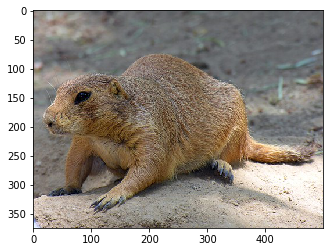

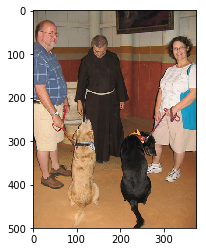

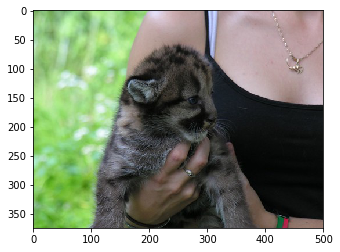

In [11]:
result = img2arr_fromURLs(df['url'][0:5])
print("Total images that we got: %i " % len(result)) # 如果不等於 5, 代表有些連結失效囉

for im_get in result:
    plt.imshow(im_get)
    plt.show()